<a href="https://colab.research.google.com/github/SVNitinSV/Inventory_projection/blob/main/LSTM_025051001_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tek_clover_Inventory_projection/025051001_ML_Outbound_Tek_clover_temporal - Sheet1.csv',index_col='Transaction Date'   ,parse_dates=True,dayfirst=True)


In [3]:
df.head()


,Qty
Transaction Date,
2023-06-27 14:42:54,18
2023-06-29 10:22:06,12
2023-06-29 14:42:16,16
2023-07-04 16:02:13,48
2023-07-04 21:23:03,20


In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

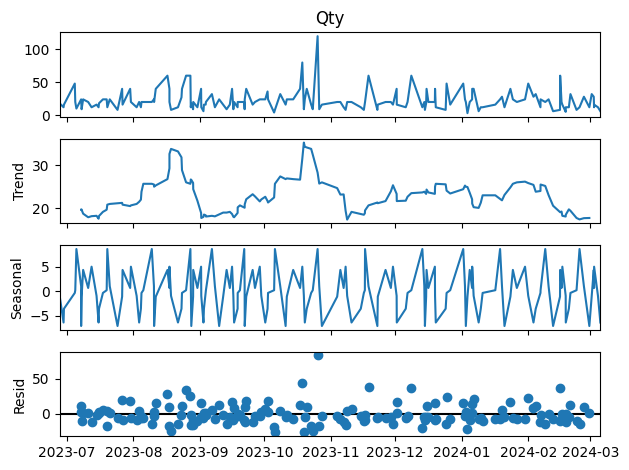

In [5]:
results = seasonal_decompose(df['Qty'], period=12)
results.plot();

In [6]:
len(df)

170

In [7]:
train = df.iloc[:156]
test = df.iloc[156:]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [9]:
df.head(),df.tail()


(                     Qty
 Transaction Date        
 2023-06-27 14:42:54   18
 2023-06-29 10:22:06   12
 2023-06-29 14:42:16   16
 2023-07-04 16:02:13   48
 2023-07-04 21:23:03   20,
                      Qty
 Transaction Date        
 2024-03-02 12:22:41   28
 2024-03-02 16:02:37   12
 2024-03-02 16:23:00   16
 2024-03-04 11:32:20   12
 2024-03-05 14:12:36    6)

In [10]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)


In [11]:
scaled_train[:10]

array([[0.12820513],
       [0.07692308],
       [0.11111111],
       [0.38461538],
       [0.14529915],
       [0.05982906],
       [0.17948718],
       [0.17948718],
       [0.05128205],
       [0.17948718]])

In [12]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [13]:
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [14]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.12820513 0.07692308 0.11111111]
Predict this y: 
 [[0.38461538]]


In [15]:
X.shape

(1, 3, 1)

In [16]:
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [18]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.fit(generator,epochs=150)

Epoch 1/150
144/144 [==============================] - 9s 24ms/step - loss: 0.0206
Epoch 2/150
144/144 [==============================] - 3s 19ms/step - loss: 0.0193
Epoch 3/150
144/144 [==============================] - 3s 19ms/step - loss: 0.0199
Epoch 4/150
144/144 [==============================] - 4s 25ms/step - loss: 0.0197
Epoch 5/150
144/144 [==============================] - 4s 28ms/step - loss: 0.0196
Epoch 6/150
144/144 [==============================] - 3s 20ms/step - loss: 0.0193
Epoch 7/150
144/144 [==============================] - 1s 10ms/step - loss: 0.0188
Epoch 8/150
144/144 [==============================] - 1s 10ms/step - loss: 0.0193
Epoch 9/150
144/144 [==============================] - 1s 10ms/step - loss: 0.0190
Epoch 10/150
144/144 [==============================] - 2s 11ms/step - loss: 0.0187
Epoch 11/150
144/144 [==============================] - 2s 16ms/step - loss: 0.0195
Epoch 12/150
144/144 [==============================] - 2s 11ms/step - loss: 0.0188
E

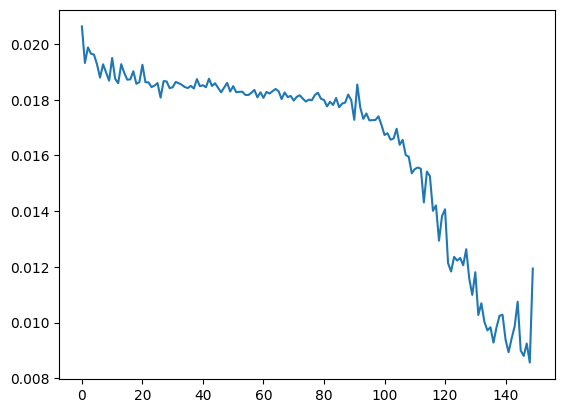

In [21]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [22]:
last_train_batch = scaled_train[-12:]

In [23]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [24]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 335ms/step


array([[0.1046256]], dtype=float32)

In [25]:
scaled_test[0]

array([0.01709402])

In [26]:

test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 46ms/step


In [27]:
test_predictions

[array([0.1046256], dtype=float32),
 array([0.13060829], dtype=float32),
 array([0.14917019], dtype=float32),
 array([0.19633284], dtype=float32),
 array([0.16170213], dtype=float32),
 array([0.17067847], dtype=float32),
 array([0.16901976], dtype=float32),
 array([0.16185713], dtype=float32),
 array([0.17131248], dtype=float32),
 array([0.16263801], dtype=float32),
 array([0.09952393], dtype=float32),
 array([0.0975628], dtype=float32),
 array([0.09987818], dtype=float32),
 array([0.10582417], dtype=float32)]

In [28]:
test.head()

,Qty
Transaction Date,
2024-02-18 10:32:28,5
2024-02-18 11:32:38,12
2024-02-19 22:02:53,12
2024-02-20 15:51:50,32
2024-02-23 11:52:25,8


In [29]:
true_predictions = scaler.inverse_transform(test_predictions)

In [30]:
test['Predictions'] = true_predictions

<ipython-input-30-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='Transaction Date'>

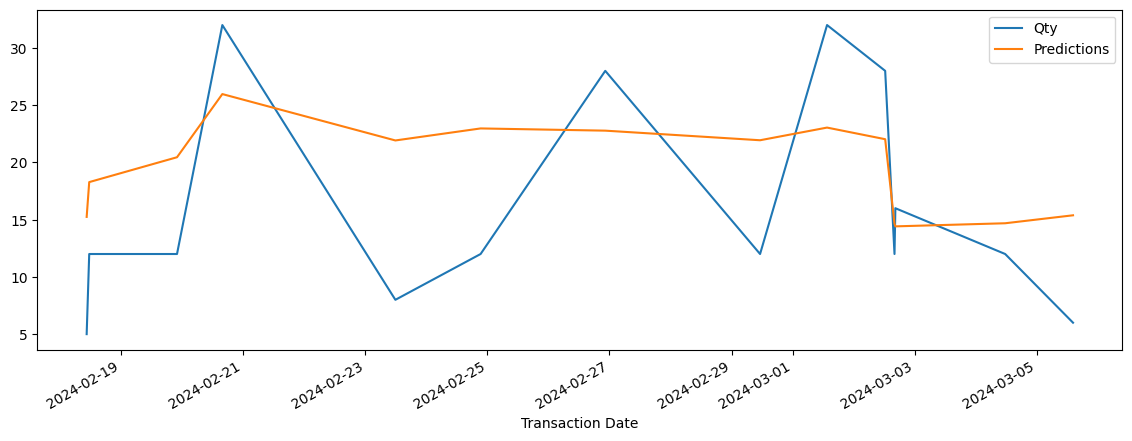

In [31]:
test.plot(figsize=(14,5))

In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Qty'],test['Predictions']))
print(rmse)


8.074907141698617


1/1 [==============================] - 0s 29ms/step
                             0
2024-03-05 14:12:36  17.501598
2024-03-06 14:12:36  19.924391
2024-03-07 14:12:36  19.092802
2024-03-08 14:12:36  22.509577
2024-03-09 14:12:36  23.163666
2024-03-10 14:12:36  22.717147
2024-03-11 14:12:36  22.985542
2024-03-12 14:12:36  20.040487
2024-03-13 14:12:36  15.922639
2024-03-14 14:12:36  15.816021
2024-03-15 14:12:36  15.937733
2024-03-16 14:12:36  15.891721
2024-03-17 14:12:36  15.433841
2024-03-18 14:12:36  16.329392
2024-03-19 14:12:36  18.202332
2024-03-20 14:12:36  19.749928
2024-03-21 14:12:36  20.996561
2024-03-22 14:12:36  19.995215
2024-03-23 14:12:36  18.468553
2024-03-24 14:12:36  16.710800
2024-03-25 14:12:36  15.791100
2024-03-26 14:12:36  15.768952
2024-03-27 14:12:36  15.888911
2024-03-28 14:12:36  16.112066
2024-03-29 14:12:36  16.402101
2024-03-30 14:12:36  16.816930
2024-03-31 14:12:36  17.844033
2024-04-01 14:12:36  18.874663
2024-04-02 14:12:36  18.554595
2024-04-03 14:12:3

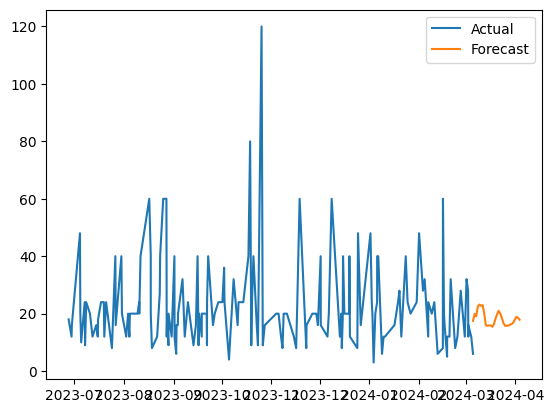

In [33]:
# prompt: how do i predict future values with this

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Forecast the next 1 months
forecast = []
last_test_batch = scaled_test[-n_input:]
last_test_batch = last_test_batch.reshape((1, n_input, n_features))

for i in range(30):
    current_pred = model.predict(last_test_batch)[0]
    forecast.append(current_pred)
    last_test_batch = np.append(last_test_batch[:,1:,:],[[current_pred]],axis=1)

# Inverse transform the forecast values
forecast_inverse = scaler.inverse_transform(forecast)

# Create a new dataframe with the forecast values
forecast_df = pd.DataFrame(forecast_inverse, index=pd.date_range(start=test.index[-1], periods=30))

# Plot the forecast values
plt.plot(df['Qty'], label='Actual')
plt.plot(forecast_df, label='Forecast')
plt.legend()
print(forecast_df)
plt.show()
